In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
flights=pd.read_excel('Data_Train.xlsx')
flights.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
flights.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
#checking missing values
flights.isnull().sum().sort_values(ascending=False)

Route              1
Total_Stops        1
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Additional_Info    0
Price              0
dtype: int64

In [6]:
#missing value rows
flights[flights.isnull().any(axis=1)].head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [7]:
flights.dropna(inplace=True)
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [8]:
flights['Date_of_Journey']=pd.to_datetime(flights['Date_of_Journey'])

flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  object        
 6   Arrival_Time     10682 non-null  object        
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 1001.4+ KB


In [9]:

flights['Dep_Time']=pd.to_datetime(flights['Dep_Time']).dt.time
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  object        
 6   Arrival_Time     10682 non-null  object        
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 1001.4+ KB


In [10]:
flights['Dep_Time']

0        22:20:00
1        05:50:00
2        09:25:00
3        18:05:00
4        16:50:00
           ...   
10678    19:55:00
10679    20:45:00
10680    08:20:00
10681    11:30:00
10682    10:55:00
Name: Dep_Time, Length: 10682, dtype: object

In [11]:
flights['Duration_min']=flights['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
flights['Duration_min']=pd.to_numeric(flights['Duration_min'])
flights['weekday']=flights[['Date_of_Journey']].apply(lambda x:x.dt.day_name())
flights['month']=flights[['Date_of_Journey']].apply(lambda x:x.dt.month_name())
flights['year']=flights[['Date_of_Journey']].apply(lambda x:x.dt.year)
flights

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_min,weekday,month,year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897,170,Sunday,March,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15,7h 25m,2 stops,No info,7662,445,Saturday,January,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25 10 Jun,19h,2 stops,No info,13882,1140,Friday,September,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30,5h 25m,1 stop,No info,6218,325,Thursday,December,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35,4h 45m,1 stop,No info,13302,285,Thursday,January,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55:00,22:25,2h 30m,non-stop,No info,4107,150,Wednesday,September,2019
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45:00,23:20,2h 35m,non-stop,No info,4145,155,Saturday,April,2019
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20:00,11:20,3h,non-stop,No info,7229,180,Saturday,April,2019
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30:00,14:10,2h 40m,non-stop,No info,12648,160,Thursday,January,2019


In [12]:
flights.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

[Text(0.5, 0, 'Airline'), Text(0, 0.5, 'Frequency of airline')]

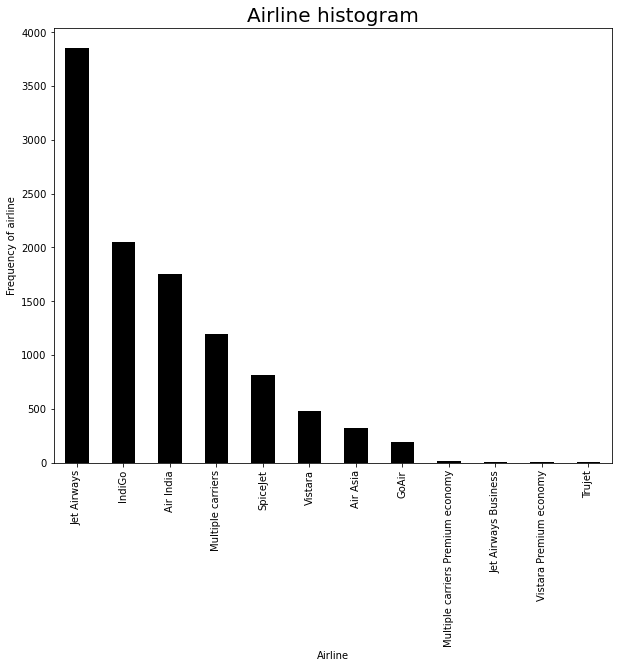

In [13]:
plt.figure(figsize=(10, 8))

plt1 = flights.Airline.value_counts().plot(kind='bar',color='black')
plt.title('Airline histogram', fontsize=20)
plt1.set(xlabel = 'Airline', ylabel='Frequency of airline')


In [14]:
temp = flights.copy()
temp['Count'] = temp.Destination.str.contains('Cochin')
temp = temp.groupby('Destination')[['Count']].count()
temp

,Count
Destination,
Banglore,2871
Cochin,4536
Delhi,1265
Hyderabad,697
Kolkata,381
New Delhi,932


In [15]:
temp2 = flights.copy()
temp2['Count'] = temp2.Source.str.contains('Delhi')
temp2 = temp2.groupby('Source')[['Count']].count()
temp2

,Count
Source,
Banglore,2197
Chennai,381
Delhi,4536
Kolkata,2871
Mumbai,697


C:\Users\anant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\anant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'New Delhi'),
  Text(1, 0, 'Banglore'),
  Text(2, 0, 'Cochin'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Hyderabad')])

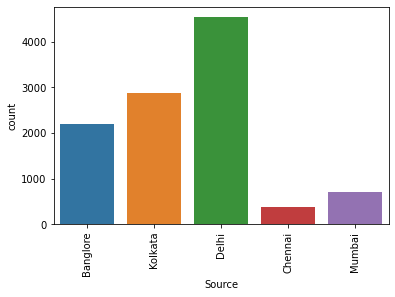

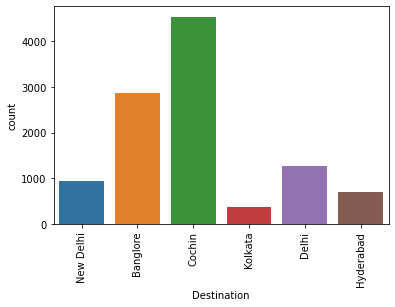

In [16]:

plot=plt.figure()
sns.countplot('Source',data=flights)
plt.xticks(rotation=90)

plot=plt.figure()
sns.countplot('Destination',data=flights)
plt.xticks(rotation=90)


C:\Users\anant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'non-stop'),
  Text(1, 0, '2 stops'),
  Text(2, 0, '1 stop'),
  Text(3, 0, '3 stops'),
  Text(4, 0, '4 stops')])

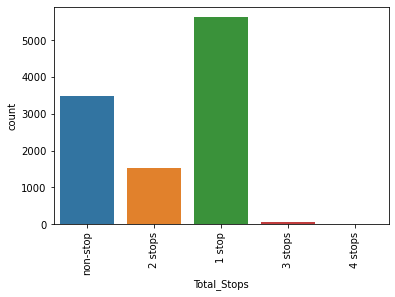

In [17]:
plot=plt.figure()
sns.countplot('Total_Stops',data=flights)
plt.xticks(rotation=90)

In [18]:
flights.groupby('Airline')['Price'].mean()

Airline
Air Asia                              5590.260188
Air India                             9612.427756
GoAir                                 5861.056701
IndiGo                                5673.682903
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
SpiceJet                              4338.284841
Trujet                                4140.000000
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Name: Price, dtype: float64

Airline
Jet Airways Business                 58358.666667
Jet Airways                          11643.923357
Multiple carriers Premium economy    11418.846154
Multiple carriers                    10902.678094
Air India                             9612.427756
Vistara Premium economy               8962.333333
Vistara                               7796.348643
GoAir                                 5861.056701
IndiGo                                5673.682903
Air Asia                              5590.260188
SpiceJet                              4338.284841
Trujet                                4140.000000
Name: Price, dtype: float64


Text(0.5, 0, 'Airlines')

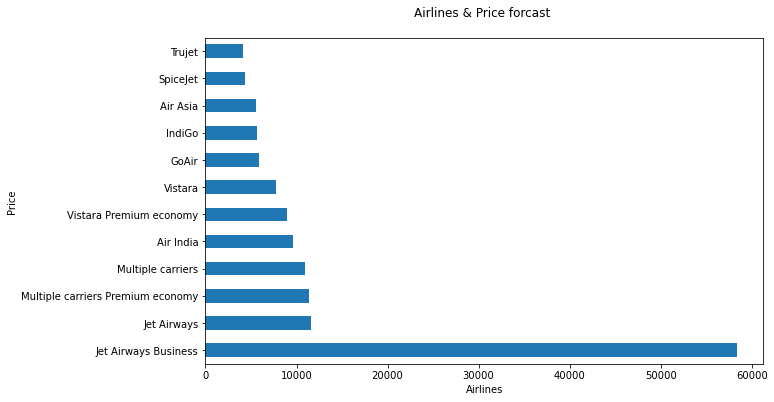

In [19]:
plt.figure(figsize=(22,6))
plt.subplot(1, 2, 1)
Top=flights.groupby('Airline')['Price'].mean().sort_values(ascending=False)
print(Top)
Top.plot(kind='barh')
plt.title('Airlines & Price forcast \n')
plt.ylabel('Price')
plt.xlabel('Airlines')

C:\Users\anant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\anant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\anant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

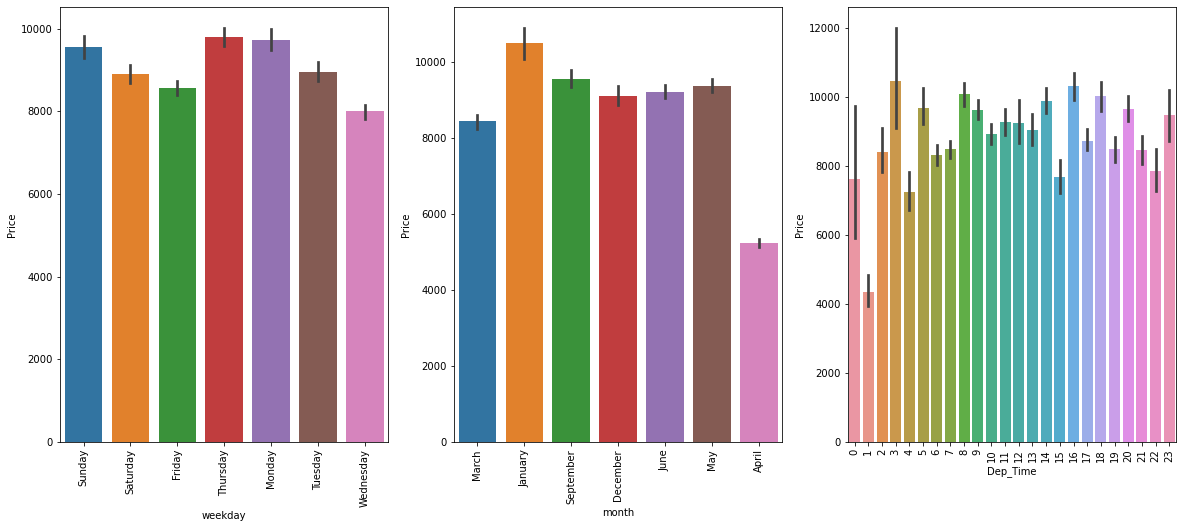

In [20]:
#now lets check the day of the journey relation with the output price column
plt.figure(figsize=(20, 8))
plt.subplot(1,3,1)
sns.barplot('weekday','Price',data=flights)
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.barplot('month','Price',data=flights)
plt.xticks(rotation=90)

#now lets check the departure time relation with the output price column
flights['Dep_Time']=flights['Dep_Time'].apply(lambda x:x.hour)
flights['Dep_Time']=pd.to_numeric(flights['Dep_Time'])
plt.subplot(1,3,3)
sns.barplot('Dep_Time','Price',data=flights)
plt.xticks(rotation=90)

C:\Users\anant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


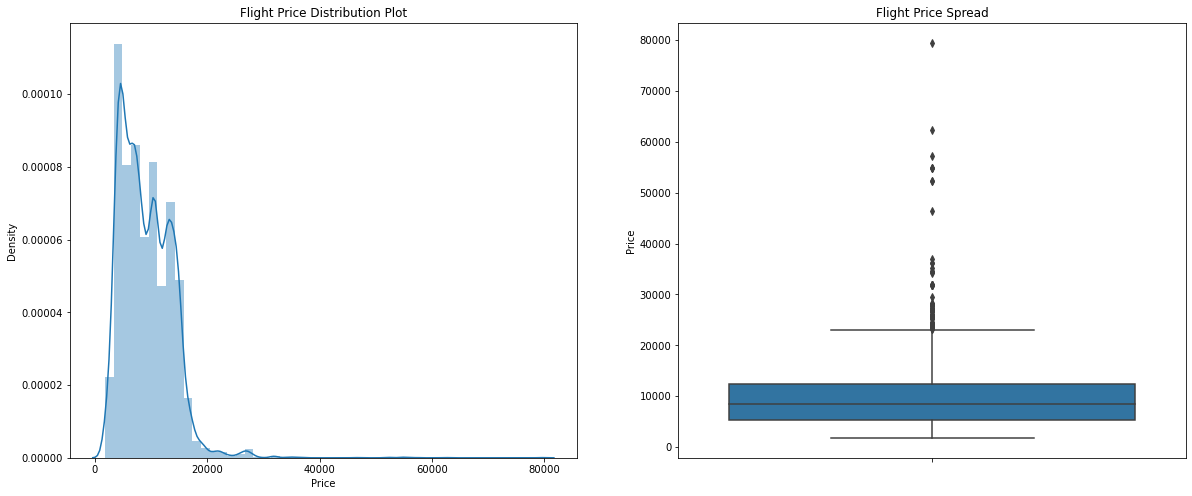

In [21]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Flight Price Distribution Plot')
sns.distplot(flights.Price)

plt.subplot(1,2,2)
plt.title('Flight Price Spread')
sns.boxplot(y=flights.Price)

plt.show()

C:\Users\anant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

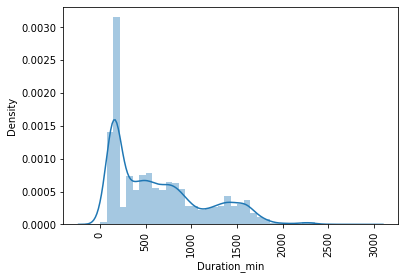

In [22]:
plot=plt.figure()
sns.distplot(flights['Duration_min'],bins=40)
plt.xticks(rotation=90)

In [23]:
gby1 = flights.groupby(['Source', 'Destination'])['Price'].mean()
gby1

Source    Destination
Banglore  Delhi           5143.918577
          New Delhi      11917.716738
Chennai   Kolkata         4789.892388
Delhi     Cochin         10540.113536
Kolkata   Banglore        9158.389411
Mumbai    Hyderabad       5059.708752
Name: Price, dtype: float64

In [24]:
gby2 = flights.groupby(['Source', 'Destination'])['Duration_min'].mean()
gby2

Source    Destination
Banglore  Delhi          171.695652
          New Delhi      654.077253
Chennai   Kolkata        139.619423
Delhi     Cochin         817.852734
Kolkata   Banglore       747.248346
Mumbai    Hyderabad      191.714491
Name: Duration_min, dtype: float64

In [25]:
gby3 = flights.groupby(['Airline','Source', 'Destination'])['Price'].mean()
gby3

Airline                            Source    Destination
Air Asia                           Banglore  Delhi           4265.577465
                                             New Delhi       5791.944444
                                   Delhi     Cochin          7804.175000
                                   Kolkata   Banglore        5012.320000
Air India                          Banglore  Delhi           6045.166667
                                             New Delhi      11045.575472
                                   Chennai   Kolkata         5895.640000
                                   Delhi     Cochin         10003.446381
                                   Kolkata   Banglore       10357.324219
                                   Mumbai    Hyderabad       6260.051471
GoAir                              Banglore  Delhi           4050.289855
                                             New Delhi       7532.333333
                                   Delhi     Cochin          6587.1